In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
def rk4(f,y0,dt,n,gamma):
  t = np.linspace(0, n * dt, n + 1)
  y = np.zeros((n+1, len(y0)))
  y[0] = y0
  for i in range(n):
    k1 = dt * f(t[i], y[i],gamma)
    k2 = dt * f(t[i] + 0.5 * dt, y[i] + 0.5 * k1,gamma)
    k3 = dt * f(t[i] + 0.5 * dt, y[i] + 0.5 * k2,gamma)
    k4 = dt * f(t[i] + dt, y[i] + k3,gamma)
    y[i + 1] = y[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)
  return y,t

In [ ]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3

#Fourier harmonics
S = 10 #spectral radius
N = 41

def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)

P = 5 #radius of peak
H = 0.008 #height of peak (max amplitude)

def A(k,l):
  return H * np.exp(-0.5*(k**2+l**2-P**2)**2/(2*P**2))

In [ ]:
k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))
omega_vals = omega(K,L)

def modulo_grid(x, y):
  x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
  y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
  return x_mod, y_mod

def f(t,pos,gamma):
  x_mod,y_mod = modulo_grid(*pos)
  u = -x_mod
  v = y_mod
  return np.array([u,v])

In [ ]:
#Single trajectory
y0 = [2,1]

dt1 = 0.1
n1 = 100
y1,t1 = rk4(f,y0,dt1,n1,0.01)

dt2 = 2
n2 = 1500
y2,t2 = rk4(f,y0,dt2,n2,0.01)

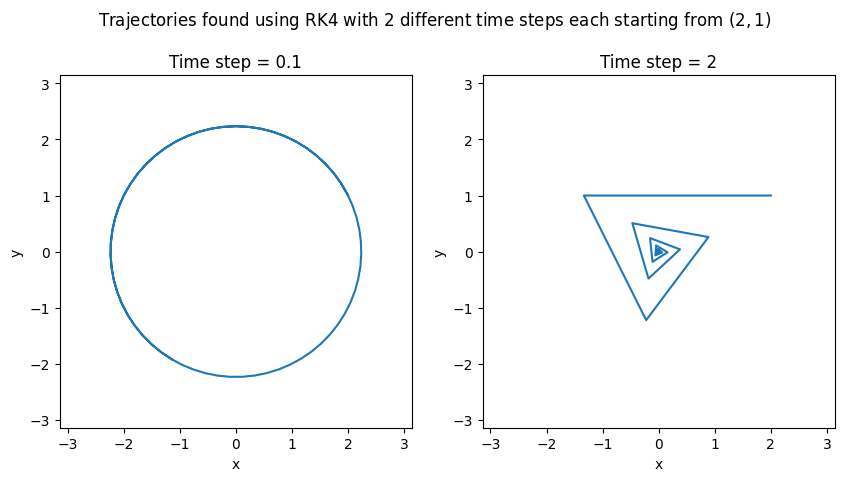

In [ ]:
#Plot absolute trajectory
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(y1[:,0],y1[:,1])
ax2.plot(y2[:,0],y2[:,1])

for ax in (ax1,ax2):
  ax.set_xlim(-np.pi, np.pi)
  ax.set_ylim(-np.pi, np.pi)
  ax.set_aspect('equal')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
fig.suptitle('Trajectories found using RK4 with 2 different time steps each starting from $(2,1)$')
ax1.set_title('Time step = {}'.format(dt1))
ax2.set_title('Time step = {}'.format(dt2))
plt.show()

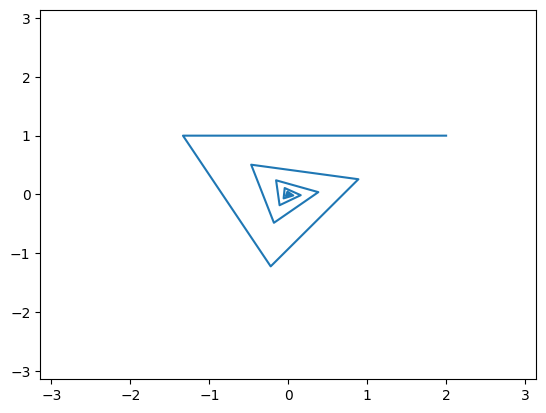

In [ ]:
#Plot the pseudo trajectory (modulo the basin)
mod_path = np.apply_along_axis(lambda col: modulo_grid(col[0], col[1]), axis=1, arr=y)
plt.plot(mod_path[:,0],mod_path[:,1])

plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.show()




In [ ]:
#Randomly select initial points
np.random.seed(42)
num_points = 100
x_coords = np.random.uniform(-np.pi, np.pi, num_points)
y_coords = np.random.uniform(-np.pi, np.pi, num_points)
initial_conditions = np.column_stack((x_coords, y_coords))

n = 10000
dt = 1/2 #time step half day

gamma = 0
solutions = []
for y0 in initial_conditions:
  sol,t = rk4(f,y0,dt,n,gamma)
  solutions.append(sol)

with open('gamma0.pickle', 'wb') as file:
    pickle.dump(solutions, file)

solutions = []
gamma = 0.05
for y0 in initial_conditions:
  sol,t = rk4(f,y0,dt,n,gamma)
  solutions.append(sol)

with open('gamma005.pickle', 'wb') as file:
    pickle.dump(solutions, file)

solutions = []
gamma = 1
for y0 in initial_conditions:
  sol,t = rk4(f,y0,dt,n,gamma)
  solutions.append(sol)

with open('gamma1.pickle', 'wb') as file:
    pickle.dump(solutions, file)



In [ ]:
sols = ['gamma0.pickle','gamma005.pickle','gamma1.pickle']
fig,(ax1,ax2,ax3) = plt.subplots(1,3)

for i,ax in enumerate(ax1,ax2,ax3):
  ax.set_xlim(-np.pi, np.pi)
  ax.set_ylim(-np.pi, np.pi)
  with open(sols[i], 'rb') as file:
    solutions = pickle.load(file)
    for sol in solutions:
      ax.plot(sol[:,0],sol[:,1])



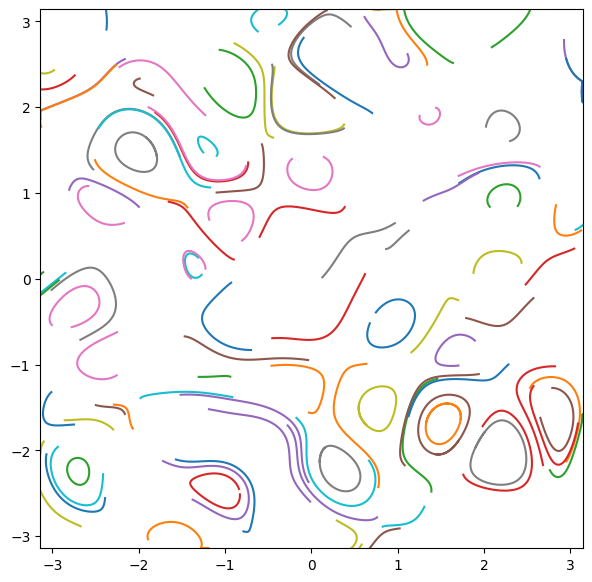

In [ ]:
#Plot the trajectories

plt.figure(figsize=(7, 7))


for sol in solutions:
  plt.plot(sol[:,0],sol[:,1])

plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.show()
